<hr /> 

## Machine Learning Marathon parte 1


> Desafio inspirado em trabalho para disciplina de Aprendizagem de Máquina do curso de Especialização em Inteligência Artificial Aplicada da Universidade Federal do Paraná (UFPR) 2021


<hr /> 


### Objetivo do desafio

Para os datasets:

- Volume;
- Biomassa;
- Admissão;
- Alunos Ensino Médio;

Treinar os seguintes modelos de **regressão**:

- Rede Neural Artificial (com Hold out, cross validation e grid search)
- K-Nearest Neighbors
- Support Vector Machine (Com hold out, cross validation e grid search)
- Random Forest (com hold out, cross validation e grid search)

Apresentando em uma tabela, todos os modelos elencando as seguintes métricas de regressão:

- Parâmetros do modelo;
- R2
- Syx
- Correlação de Pearson
- RMSE
- MAE

<hr />

 Observações:
 
- A tabela de modelos para cada dataset deve ser ordenada por maior R2;
- Apresentar um gráfico de residuos para cada tabela para o modelo de maior R2;

<hr /> 

-> Resultados elencados no final do arquivo

In [35]:
# Modulos e bibliotecas necessários

# Visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot

# modelos
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# métricas de regressão
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import pearsonr
import numpy as np

# Opta por utilziar a visualização linda do seaborn <3
plt.style.use('seaborn')

In [2]:
# Define os caminhos para os arquivos de dados em um dicionário
files = {
    'volume': 'datasets/volume/Material 02 - 3 – Estimativa de Volume - Dados.csv',
    'biomassa': 'datasets/biomass/Material 02 - 4 - R - Biomassa - Dados.csv',
    'admissao': 'datasets/admissao/Material 02 - 8 – R - Admissao - Dados.csv',
    'alunos_em': 'datasets/alunos_em/Material 02 - 10 – Alunos - Dados.csv'
}

# Funções de métricas manualmente implementadas
def r2(predicted, target):
    return 1 - (sum((predicted - target)**2) / sum((predicted - np.mean(target)**2)))

# Syx
def syx(predicted, target, feature_size):
    return  sum((predicted - target)**2) / (len(target) - feature_size)


<hr /> 

# Dataset 1 - Volume

<hr /> 


In [3]:
volume_df = pd.read_csv(files['volume'])
volume_df.head()

,PROJETO,CLONE,Idade,Hdom,AreaBasal,Volume
0,Fazenda Velha,C3,21.5,8.8,3.2,12.1
1,Fazenda Velha,A3,21.9,10.2,3.9,66.8
2,Fazenda Velha,A3,26.1,10.1,4.2,72.1
3,Fazenda Velha,A4,22.0,10.0,4.2,35.9
4,Parada,B7,23.4,15.3,4.3,44.5


## Criação da partição de dados
<br />
Os dados serão divididos em 80% para treino e 20% para teste.

- Desconsiderou-se as variáveis categóricas `PROJETO` e `CLONE`;

In [4]:
volume_X_train, volume_X_test, volume_y_train, volume_y_test = train_test_split(
    volume_df[['Idade', 'Hdom', 'AreaBasal']].values,
    volume_df.Volume,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', volume_X_train.shape)
print('Train y shape ', volume_y_train.shape)
print('Test X shape ', volume_X_test.shape)
print('Test y shape ', volume_y_test.shape)

Train X shape  (244, 3)
Train y shape  (244,)
Test X shape  (62, 3)
Test y shape  (62,)


## Rede Neural Artificial
<br />
 A rede neural utilizada será uma *Multi Layer Perceptron Regressor (MLP REGRESSOR)* do sci-kit learn
 
 A rede será treinada com os métodos:
 - *Hold out*
 - *Cross Validation*
 - *Grid Search*

In [5]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
volume_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
volume_mlp = MLPRegressor(random_state=2154)
volume_mlp.fit(volume_X_train, volume_y_train)

# MLP com cros val
volume_cv_mlp = GridSearchCV(volume_mlp, param_grid={}, cv=10)
volume_cv_mlp.fit(volume_X_train, volume_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
volume_grid_mlp = GridSearchCV(volume_mlp, parameter_space, n_jobs=-1, cv=10)
volume_grid_mlp.fit(volume_X_train, volume_y_train)

mlps = [volume_mlp, volume_cv_mlp, volume_grid_mlp]

# Métricas
for key, model in zip(volume_mlps.keys(), mlps):
    predicts = model.predict(volume_X_test)
    # R2 Manual
    volume_mlps[key].append(r2(predicts, volume_y_test))
    # R2 do sklearn
    volume_mlps[key].append(r2_score(predicts, volume_y_test))
    # SYX
    volume_mlps[key].append(syx(predicts, volume_y_test, len(volume_X_test[0])))
    # Pearson
    volume_mlps[key].append(pearsonr(volume_y_test, predicts)[0])
    # RMSE
    volume_mlps[key].append(np.sqrt(mean_squared_error(volume_y_test, predicts)))
    # MAE
    volume_mlps[key].append(mean_absolute_error(volume_y_test, predicts))


# parametros dos modelos
volume_mlps['mlp_hold_out'].insert(0, {
    'size': volume_mlp.get_params()['hidden_layer_sizes'],
    'alpha': volume_mlp.get_params()['alpha'],
})
volume_mlps['mlp_cross_val'].insert(0, {
    'size': volume_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': volume_cv_mlp.estimator.get_params()['alpha'],
})
volume_mlps['mlp_grid_search'].insert(0, {
    'size': volume_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': volume_grid_mlp.best_params_['alpha'],
})

## K-Nearest Neighbors
<br />

Treinar o KNN com:
- *Grid Search*


In [6]:
%%capture

# Treina a KNN
volume_knn = KNeighborsRegressor()
volume_knn = GridSearchCV(volume_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
volume_knn.fit(volume_X_train, volume_y_train)

# predicts
knn_predicts = volume_knn.predict(volume_X_test)

knn_metrics = {
    'knn': [
        {'k': volume_knn.best_params_['n_neighbors']},
        r2(knn_predicts, volume_y_test),  # R2 Manual
        r2_score(knn_predicts, volume_y_test),  # R2 do sklearn
        syx(knn_predicts, volume_y_test, len(volume_X_test[0])),  # SYX
        pearsonr(volume_y_test, knn_predicts)[0],  # Pearson
        np.sqrt(mean_squared_error(volume_y_test, knn_predicts)), # RMSE
        mean_absolute_error(volume_y_test, knn_predicts)  # MAE
    ]
}

## Support Vector Machine -  SVR
<br />
 A SVM utilizada será a *Support Vector Regressor* disponibilizada pelo SKlearn
 
 A SVR será treinada com os métodos:
 - *Hold out*
 - *Cross Validation*
 - *Grid Search*

In [7]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
volume_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
volume_svr = SVR()
volume_svr.fit(volume_X_train, volume_y_train)

# SVR com cross val
volume_cv_svr = GridSearchCV(volume_svr, param_grid={}, cv=10)
volume_cv_svr.fit(volume_X_train, volume_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
        'epsilon': [0.1, 0.2, 0.3, 0.5, 0.7]
    },
]
volume_grid_svr = GridSearchCV(volume_svr, param_grid, n_jobs=-1, cv=10)
volume_grid_svr.fit(volume_X_train, volume_y_train)


svrs = [volume_svr, volume_cv_svr, volume_grid_svr]

# Métricas
for key, model in zip(volume_svms.keys(), svrs):
    predicts = model.predict(volume_X_test)
    # R2 Manual
    volume_svms[key].append(r2(predicts, volume_y_test))
    # R2 do sklearn
    volume_svms[key].append(r2_score(predicts, volume_y_test))
    # SYX
    volume_svms[key].append(syx(predicts, volume_y_test, len(volume_X_test[0])))
    # Pearson
    volume_svms[key].append(pearsonr(volume_y_test, predicts)[0])
    # RMSE
    volume_svms[key].append(np.sqrt(mean_squared_error(volume_y_test, predicts)))
    # MAE
    volume_svms[key].append(mean_absolute_error(volume_y_test, predicts))


# Parametros dos modelos
volume_svms['svm_hold_out'].insert(0, {
    'C': volume_svr.get_params()['C'],
    'epsilon': volume_svr.get_params()['epsilon'],
})
volume_svms['svm_cross_val'].insert(0, {
    'C': volume_cv_svr.estimator.get_params()['C'],
    'epsilon': volume_cv_svr.estimator.get_params()['epsilon'],
})
volume_svms['svm_grid_search'].insert(0, {
    'C': volume_grid_svr.best_params_['C'],
    'epsilon': volume_grid_svr.best_params_['epsilon'],
})

## Random Forest
<br />
 A Floresta Aleatória utilizada será a *Random Forest Regressor* disponibilizada pelo SKlearn
 
 A RF será treinada com os métodos:
 - *Hold out*
 - *Cross Validation*
 - *Grid Search*

In [8]:
%%capture

# Inicializa uma coleção de RF a se preencher
volume_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
volume_rf = RandomForestRegressor()
volume_rf.fit(volume_X_train, volume_y_train)

# RF com cross val
volume_cv_rf = GridSearchCV(volume_rf, param_grid={}, cv=10)
volume_cv_rf.fit(volume_X_train, volume_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
volume_grid_rf = GridSearchCV(volume_rf, param_grid, n_jobs=-1, cv=10)
volume_grid_rf.fit(volume_X_train, volume_y_train)

rfs = [volume_rf, volume_cv_rf, volume_grid_rf]

# Métricas
for key, predicts in zip(volume_rfs.keys(), rfs):
    predicts = model.predict(volume_X_test)
    # R2 Manual
    volume_rfs[key].append(r2(predicts, volume_y_test))
    # R2 do sklearn
    volume_rfs[key].append(r2_score(predicts, volume_y_test))
    # SYX
    volume_rfs[key].append(syx(predicts, volume_y_test, len(volume_X_test[0])))
    # Pearson
    volume_rfs[key].append(pearsonr(volume_y_test, predicts)[0])
    # RMSE
    volume_rfs[key].append(np.sqrt(mean_squared_error(volume_y_test, predicts)))
    # MAE
    volume_rfs[key].append(mean_absolute_error(volume_y_test, predicts))

# Parametros dos modelos
volume_rfs['rf_hold_out'].insert(0, {
    'n_estimators': volume_rf.get_params()['n_estimators'],
    'max_depth': volume_rf.get_params()['max_depth'],
})
volume_rfs['rf_cross_val'].insert(0, {
    'n_estimators': volume_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': volume_cv_rf.estimator.get_params()['max_depth'],
})
volume_rfs['rf_grid_search'].insert(0, {
    'n_estimators': volume_grid_rf.best_params_['n_estimators'],
    'max_depth': volume_grid_rf.best_params_['max_depth'],
})

## Agrupando a tabela de modelos para o dataset Volumes

In [37]:
volume_models = pd.DataFrame()
volume_collections = [volume_mlps, volume_svms, volume_rfs, knn_metrics]

for collection in volume_collections:
    volume_models = volume_models.append(pd.DataFrame.from_dict(collection).T)

volume_models.columns = ['Params', 'R2 Manual', 'R2 Sklearn', 'SYX', 'Pearson', 'RMSE', 'MAE']
volume_models

,Params,R2 Manual,R2 Sklearn,SYX,Pearson,RMSE,MAE
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",1.070423,0.500642,10019.346045,0.846014,97.644964,75.697968
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",1.070423,0.500642,10019.346045,0.846014,97.644964,75.697968
mlp_grid_search,"{'size': (100,), 'alpha': 0.05}",1.070294,0.501599,10001.102586,0.846675,97.556026,75.692644
svm_hold_out,"{'C': 1.0, 'epsilon': 0.1}",1.153781,-12.514327,21882.144318,0.827616,144.302914,120.166135
svm_cross_val,"{'C': 1.0, 'epsilon': 0.1}",1.153781,-12.514327,21882.144318,0.827616,144.302914,120.166135
svm_grid_search,"{'C': 50, 'epsilon': 0.7}",1.082198,0.589168,11693.0762,0.845593,105.485934,82.047433
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",1.082198,0.589168,11693.0762,0.845593,105.485934,82.047433
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",1.082198,0.589168,11693.0762,0.845593,105.485934,82.047433
rf_grid_search,"{'n_estimators': 50, 'max_depth': 4}",1.082198,0.589168,11693.0762,0.845593,105.485934,82.047433
knn,{'k': 5},1.045108,0.802438,5.521455,0.931371,1.960625,1.306329


<hr />

# Dataset 2 - Biomassa

<hr />

In [10]:
biomass_df = pd.read_csv(files['biomassa'])
biomass_df.head()

,dap,h,Me,biomassa
0,6.4,5.0,1.04,7.07
1,7.3,5.0,1.04,10.30
2,7.8,5.5,1.04,13.90
3,9.2,7.6,1.04,18.61
4,9.9,8.2,1.04,30.97


In [11]:
biomass_X_train, biomass_X_test, biomass_y_train, biomass_y_test = train_test_split(
    biomass_df[['dap', 'h', 'Me']].values,
    biomass_df.biomassa,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', biomass_X_train.shape)
print('Train y shape ', biomass_y_train.shape)
print('Test X shape ', biomass_X_test.shape)
print('Test y shape ', biomass_y_test.shape)

Train X shape  (240, 3)
Train y shape  (240,)
Test X shape  (60, 3)
Test y shape  (60,)


## MLP - Biomassa

In [12]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
biomass_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
biomass_mlp = MLPRegressor(random_state=2154)
biomass_mlp.fit(biomass_X_train, biomass_y_train)

# MLP com cros val
biomass_cv_mlp = GridSearchCV(biomass_mlp, param_grid={}, cv=10)
biomass_cv_mlp.fit(biomass_X_train, biomass_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
biomass_grid_mlp = GridSearchCV(biomass_mlp, parameter_space, n_jobs=-1, cv=10)
biomass_grid_mlp.fit(biomass_X_train, biomass_y_train)

mlps = [biomass_mlp, biomass_cv_mlp, biomass_grid_mlp]

# Métricas
for key, model in zip(biomass_mlps.keys(), mlps):
    predicts = model.predict(biomass_X_test)
    # R2 Manual
    biomass_mlps[key].append(r2(predicts, biomass_y_test))
    # R2 do sklearn
    biomass_mlps[key].append(r2_score(predicts, biomass_y_test))
    # SYX
    biomass_mlps[key].append(syx(predicts, biomass_y_test, len(biomass_X_test[0])))
    # Pearson
    biomass_mlps[key].append(pearsonr(biomass_y_test, predicts)[0])
    # RMSE
    biomass_mlps[key].append(np.sqrt(mean_squared_error(biomass_y_test, predicts)))
    # MAE
    biomass_mlps[key].append(mean_absolute_error(biomass_y_test, predicts))


# parametros dos modelos
biomass_mlps['mlp_hold_out'].insert(0, {
    'size': biomass_mlp.get_params()['hidden_layer_sizes'],
    'alpha': biomass_mlp.get_params()['alpha'],
})
biomass_mlps['mlp_cross_val'].insert(0, {
    'size': biomass_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': biomass_cv_mlp.estimator.get_params()['alpha'],
})
biomass_mlps['mlp_grid_search'].insert(0, {
    'size': biomass_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': biomass_grid_mlp.best_params_['alpha'],
})

## KNN - Biomassa

In [13]:
%%capture

# Treina a KNN
biomass_knn = KNeighborsRegressor()
biomass_knn = GridSearchCV(biomass_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
biomass_knn.fit(biomass_X_train, biomass_y_train)

# predicts
knn_predicts = biomass_knn.predict(biomass_X_test)

knn_metrics = {
    'knn': [
        {'k': biomass_knn.best_params_['n_neighbors']},
        r2(knn_predicts, biomass_y_test),  # R2 Manual
        r2_score(knn_predicts, biomass_y_test),  # R2 do sklearn
        syx(knn_predicts, biomass_y_test, len(biomass_X_test[0])),  # SYX
        pearsonr(biomass_y_test, knn_predicts)[0],  # Pearson
        np.sqrt(mean_squared_error(biomass_y_test, knn_predicts)), # RMSE
        mean_absolute_error(biomass_y_test, knn_predicts)  # MAE
    ]
}

## SVM - Biomassa

In [14]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
biomass_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
biomass_svr = SVR()
biomass_svr.fit(biomass_X_train, biomass_y_train)

# SVR com cross val
biomass_cv_svr = GridSearchCV(biomass_svr, param_grid={}, cv=10)
biomass_cv_svr.fit(biomass_X_train, biomass_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
        'epsilon': [0.1, 0.2, 0.3, 0.5, 0.7]
    },
]
biomass_grid_svr = GridSearchCV(biomass_svr, param_grid, n_jobs=-1, cv=10)
biomass_grid_svr.fit(biomass_X_train, biomass_y_train)


svrs = [biomass_svr, biomass_cv_svr, biomass_grid_svr]

# Métricas
for key, model in zip(biomass_svms.keys(), svrs):
    predicts = model.predict(biomass_X_test)
    # R2 Manual
    biomass_svms[key].append(r2(predicts, biomass_y_test))
    # R2 do sklearn
    biomass_svms[key].append(r2_score(predicts, biomass_y_test))
    # SYX
    biomass_svms[key].append(syx(predicts, biomass_y_test, len(biomass_X_test[0])))
    # Pearson
    biomass_svms[key].append(pearsonr(biomass_y_test, predicts)[0])
    # RMSE
    biomass_svms[key].append(np.sqrt(mean_squared_error(biomass_y_test, predicts)))
    # MAE
    biomass_svms[key].append(mean_absolute_error(biomass_y_test, predicts))


# Parametros dos modelos
biomass_svms['svm_hold_out'].insert(0, {
    'C': biomass_svr.get_params()['C'],
    'epsilon': biomass_svr.get_params()['epsilon'],
})
biomass_svms['svm_cross_val'].insert(0, {
    'C': biomass_cv_svr.estimator.get_params()['C'],
    'epsilon': biomass_cv_svr.estimator.get_params()['epsilon'],
})
biomass_svms['svm_grid_search'].insert(0, {
    'C': biomass_grid_svr.best_params_['C'],
    'epsilon': biomass_grid_svr.best_params_['epsilon'],
})

## RF - Biomassa

In [15]:
%%capture

# Inicializa uma coleção de RF a se preencher
biomass_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
biomass_rf = RandomForestRegressor()
biomass_rf.fit(biomass_X_train, biomass_y_train)

# RF com cross val
biomass_cv_rf = GridSearchCV(biomass_rf, param_grid={}, cv=10)
biomass_cv_rf.fit(biomass_X_train, biomass_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
biomass_grid_rf = GridSearchCV(biomass_rf, param_grid, n_jobs=-1, cv=10)
biomass_grid_rf.fit(biomass_X_train, biomass_y_train)

rfs = [biomass_rf, biomass_cv_rf, biomass_grid_rf]

# Métricas
for key, predicts in zip(biomass_rfs.keys(), rfs):
    predicts = model.predict(biomass_X_test)
    # R2 Manual
    biomass_rfs[key].append(r2(predicts, biomass_y_test))
    # R2 do sklearn
    biomass_rfs[key].append(r2_score(predicts, biomass_y_test))
    # SYX
    biomass_rfs[key].append(syx(predicts, biomass_y_test, len(biomass_X_test[0])))
    # Pearson
    biomass_rfs[key].append(pearsonr(biomass_y_test, predicts)[0])
    # RMSE
    biomass_rfs[key].append(np.sqrt(mean_squared_error(biomass_y_test, predicts)))
    # MAE
    biomass_rfs[key].append(mean_absolute_error(biomass_y_test, predicts))

# Parametros dos modelos
biomass_rfs['rf_hold_out'].insert(0, {
    'n_estimators': biomass_rf.get_params()['n_estimators'],
    'max_depth': biomass_rf.get_params()['max_depth'],
})
biomass_rfs['rf_cross_val'].insert(0, {
    'n_estimators': biomass_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': biomass_cv_rf.estimator.get_params()['max_depth'],
})
biomass_rfs['rf_grid_search'].insert(0, {
    'n_estimators': biomass_grid_rf.best_params_['n_estimators'],
    'max_depth': biomass_grid_rf.best_params_['max_depth'],
})

## Agrupando a tabela de modelos para Biomassa

In [52]:
biomass_models = pd.DataFrame()
biomass_collections = [biomass_mlps, biomass_svms, biomass_rfs, knn_metrics]

for collection in biomass_collections:
    biomass_models = biomass_models.append(pd.DataFrame.from_dict(collection).T)

biomass_models.columns = ['Params', 'R2 Manual', 'R2 Sklearn', 'SYX', 'Pearson', 'RMSE', 'MAE']
biomass_models

,Params,R2 Manual,R2 Sklearn,SYX,Pearson,RMSE,MAE
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",2.543841,-4.400916,115176.30396,0.875833,330.783145,237.199107
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",2.543841,-4.400916,115176.30396,0.875833,330.783145,237.199107
mlp_grid_search,"{'size': (100,), 'alpha': 0.0001}",2.543841,-4.400916,115176.30396,0.875833,330.783145,237.199107
svm_hold_out,"{'C': 1.0, 'epsilon': 0.1}",3.91933,-274.354347,218561.021361,0.725198,455.667609,207.603475
svm_cross_val,"{'C': 1.0, 'epsilon': 0.1}",3.91933,-274.354347,218561.021361,0.725198,455.667609,207.603475
svm_grid_search,"{'C': 50, 'epsilon': 0.1}",1.76196,0.124332,56961.089431,0.942562,232.622086,96.587559
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",1.76196,0.124332,56961.089431,0.942562,232.622086,96.587559
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",1.76196,0.124332,56961.089431,0.942562,232.622086,96.587559
rf_grid_search,"{'n_estimators': 100, 'max_depth': 4}",1.76196,0.124332,56961.089431,0.942562,232.622086,96.587559
knn,{'k': 5},1.045108,0.802438,5.521455,0.931371,1.960625,1.306329


<hr />

# Dataset 3 - Admissão

<hr />

In [17]:
admission_df = pd.read_csv(files['admissao'])
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
admission_X_train, admission_X_test, admission_y_train, admission_y_test = train_test_split(
    admission_df[admission_df.columns[1:-1]].values,
    admission_df.ChanceOfAdmit,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', admission_X_train.shape)
print('Train y shape ', admission_y_train.shape)
print('Test X shape ', admission_X_test.shape)
print('Test y shape ', admission_y_test.shape)

Train X shape  (400, 7)
Train y shape  (400,)
Test X shape  (100, 7)
Test y shape  (100,)


## MLP - Admissão

In [19]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
admission_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
admission_mlp = MLPRegressor(random_state=2154)
admission_mlp.fit(admission_X_train, admission_y_train)

# MLP com cros val
admission_cv_mlp = GridSearchCV(admission_mlp, param_grid={}, cv=10)
admission_cv_mlp.fit(admission_X_train, admission_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
admission_grid_mlp = GridSearchCV(admission_mlp, parameter_space, n_jobs=-1, cv=10)
admission_grid_mlp.fit(admission_X_train, admission_y_train)

mlps = [admission_mlp, admission_cv_mlp, admission_grid_mlp]

# Métricas
for key, model in zip(admission_mlps.keys(), mlps):
    predicts = model.predict(admission_X_test)
    # R2 Manual
    admission_mlps[key].append(r2(predicts, admission_y_test))
    # R2 do sklearn
    admission_mlps[key].append(r2_score(predicts, admission_y_test))
    # SYX
    admission_mlps[key].append(syx(predicts, admission_y_test, len(admission_X_test[0])))
    # Pearson
    admission_mlps[key].append(pearsonr(admission_y_test, predicts)[0])
    # RMSE
    admission_mlps[key].append(np.sqrt(mean_squared_error(admission_y_test, predicts)))
    # MAE
    admission_mlps[key].append(mean_absolute_error(admission_y_test, predicts))


# parametros dos modelos
admission_mlps['mlp_hold_out'].insert(0, {
    'size': admission_mlp.get_params()['hidden_layer_sizes'],
    'alpha': admission_mlp.get_params()['alpha'],
})
admission_mlps['mlp_cross_val'].insert(0, {
    'size': admission_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': admission_cv_mlp.estimator.get_params()['alpha'],
})
admission_mlps['mlp_grid_search'].insert(0, {
    'size': admission_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': admission_grid_mlp.best_params_['alpha'],
})

## KNN - Admissão

In [20]:
%%capture

# Treina a KNN
admission_knn = KNeighborsRegressor()
admission_knn = GridSearchCV(admission_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
admission_knn.fit(admission_X_train, admission_y_train)

# predicts
knn_predicts = admission_knn.predict(admission_X_test)

knn_metrics = {
    'knn': [
        {'k': admission_knn.best_params_['n_neighbors']},
        r2(knn_predicts, admission_y_test),  # R2 Manual
        r2_score(knn_predicts, admission_y_test),  # R2 do sklearn
        syx(knn_predicts, admission_y_test, len(admission_X_test[0])),  # SYX
        pearsonr(admission_y_test, knn_predicts)[0],  # Pearson
        np.sqrt(mean_squared_error(admission_y_test, knn_predicts)), # RMSE
        mean_absolute_error(admission_y_test, knn_predicts)  # MAE
    ]
}

## SVM - Admissão

In [21]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
admission_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
admission_svr = SVR()
admission_svr.fit(admission_X_train, admission_y_train)

# SVR com cross val
admission_cv_svr = GridSearchCV(admission_svr, param_grid={}, cv=10)
admission_cv_svr.fit(admission_X_train, admission_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
        'epsilon': [0.1, 0.2, 0.3, 0.5, 0.7]
    },
]
admission_grid_svr = GridSearchCV(admission_svr, param_grid, n_jobs=-1, cv=10)
admission_grid_svr.fit(admission_X_train, admission_y_train)


svrs = [admission_svr, admission_cv_svr, admission_grid_svr]

# Métricas
for key, model in zip(admission_svms.keys(), svrs):
    predicts = model.predict(admission_X_test)
    # R2 Manual
    admission_svms[key].append(r2(predicts, admission_y_test))
    # R2 do sklearn
    admission_svms[key].append(r2_score(predicts, admission_y_test))
    # SYX
    admission_svms[key].append(syx(predicts, admission_y_test, len(admission_X_test[0])))
    # Pearson
    admission_svms[key].append(pearsonr(admission_y_test, predicts)[0])
    # RMSE
    admission_svms[key].append(np.sqrt(mean_squared_error(admission_y_test, predicts)))
    # MAE
    admission_svms[key].append(mean_absolute_error(admission_y_test, predicts))


# Parametros dos modelos
admission_svms['svm_hold_out'].insert(0, {
    'C': admission_svr.get_params()['C'],
    'epsilon': admission_svr.get_params()['epsilon'],
})
admission_svms['svm_cross_val'].insert(0, {
    'C': admission_cv_svr.estimator.get_params()['C'],
    'epsilon': admission_cv_svr.estimator.get_params()['epsilon'],
})
admission_svms['svm_grid_search'].insert(0, {
    'C': admission_grid_svr.best_params_['C'],
    'epsilon': admission_grid_svr.best_params_['epsilon'],
})

## RF - Admissão

In [22]:
%%capture

# Inicializa uma coleção de RF a se preencher
admission_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
admission_rf = RandomForestRegressor()
admission_rf.fit(admission_X_train, admission_y_train)

# RF com cross val
admission_cv_rf = GridSearchCV(admission_rf, param_grid={}, cv=10)
admission_cv_rf.fit(admission_X_train, admission_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
admission_grid_rf = GridSearchCV(admission_rf, param_grid, n_jobs=-1, cv=10)
admission_grid_rf.fit(admission_X_train, admission_y_train)

rfs = [admission_rf, admission_cv_rf, admission_grid_rf]

# Métricas
for key, predicts in zip(admission_rfs.keys(), rfs):
    predicts = model.predict(admission_X_test)
    # R2 Manual
    admission_rfs[key].append(r2(predicts, admission_y_test))
    # R2 do sklearn
    admission_rfs[key].append(r2_score(predicts, admission_y_test))
    # SYX
    admission_rfs[key].append(syx(predicts, admission_y_test, len(admission_X_test[0])))
    # Pearson
    admission_rfs[key].append(pearsonr(admission_y_test, predicts)[0])
    # RMSE
    admission_rfs[key].append(np.sqrt(mean_squared_error(admission_y_test, predicts)))
    # MAE
    admission_rfs[key].append(mean_absolute_error(admission_y_test, predicts))

# Parametros dos modelos
admission_rfs['rf_hold_out'].insert(0, {
    'n_estimators': admission_rf.get_params()['n_estimators'],
    'max_depth': admission_rf.get_params()['max_depth'],
})
admission_rfs['rf_cross_val'].insert(0, {
    'n_estimators': admission_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': admission_cv_rf.estimator.get_params()['max_depth'],
})
admission_rfs['rf_grid_search'].insert(0, {
    'n_estimators': admission_grid_rf.best_params_['n_estimators'],
    'max_depth': admission_grid_rf.best_params_['max_depth'],
})

## Agrupando tabela de modelos para Admissão

In [53]:
admission_models = pd.DataFrame()
admission_collections = [admission_mlps, admission_svms, admission_rfs, knn_metrics]

for collection in admission_collections:
    admission_models = admission_models.append(pd.DataFrame.from_dict(collection).T)

admission_models.columns = ['Params', 'R2 Manual', 'R2 Sklearn', 'SYX', 'Pearson', 'RMSE', 'MAE']
admission_models

,Params,R2 Manual,R2 Sklearn,SYX,Pearson,RMSE,MAE
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.867739,0.098564,0.028456,0.436034,0.162678,0.128093
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.867739,0.098564,0.028456,0.436034,0.162678,0.128093
mlp_grid_search,"{'size': (50, 50, 50), 'alpha': 0.05}",0.965938,0.485674,0.007039,0.77822,0.080907,0.061438
svm_hold_out,"{'C': 1.0, 'epsilon': 0.1}",0.9707,0.409612,0.00546,0.857187,0.07126,0.058548
svm_cross_val,"{'C': 1.0, 'epsilon': 0.1}",0.9707,0.409612,0.00546,0.857187,0.07126,0.058548
svm_grid_search,"{'C': 50, 'epsilon': 0.1}",0.974594,0.662737,0.00463,0.883297,0.065621,0.054795
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.974594,0.662737,0.00463,0.883297,0.065621,0.054795
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.974594,0.662737,0.00463,0.883297,0.065621,0.054795
rf_grid_search,"{'n_estimators': 500, 'max_depth': 4}",0.974594,0.662737,0.00463,0.883297,0.065621,0.054795
knn,{'k': 5},1.045108,0.802438,5.521455,0.931371,1.960625,1.306329


<hr />

# Dataset 4 - Alunos Ensino Médio

<hr />

In [24]:
students_df = pd.read_csv(files['alunos_em'])
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,2,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,2,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,2,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,2,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,2,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [25]:
# remove as variáveis categóricas
students_df.drop(
    ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'],
    axis=1,
    inplace=True
)

# Subsitui valores categóricos binários
transpose = {'yes': 1, 'no': 0}
students_df['schoolsup'] = [transpose[i] for i in students_df.schoolsup.values]
students_df['famsup'] = [transpose[i] for i in students_df.famsup.values]
students_df['paid'] = [transpose[i] for i in students_df.paid.values]
students_df['activities'] = [transpose[i] for i in students_df.activities.values]
students_df['nursery'] = [transpose[i] for i in students_df.nursery.values]
students_df['higher'] = [transpose[i] for i in students_df.higher.values]
students_df['internet'] = [transpose[i] for i in students_df.internet.values]
students_df['romantic'] = [transpose[i] for i in students_df.romantic.values]

students_df.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,2,18,4,4,2,2,0,1,0,0,...,4,3,4,1,1,3,6,5,6,6
1,2,17,1,1,1,2,0,0,1,0,...,5,3,3,1,1,3,4,5,5,6
2,2,15,1,1,1,2,3,1,0,1,...,4,3,2,2,3,3,10,7,8,10
3,2,15,4,2,1,3,0,0,1,1,...,3,2,2,1,1,5,2,15,14,15
4,2,16,3,3,1,2,0,0,1,1,...,4,3,2,1,2,5,4,6,10,10


In [26]:
students_X_train, students_X_test, students_y_train, students_y_test = train_test_split(
    students_df[students_df.columns[:-1]].values,
    students_df.G3,
    test_size=0.2,
    random_state=2154
)

# Exibe os shapes das partições
print('Train X shape ', students_X_train.shape)
print('Train y shape ', students_y_train.shape)
print('Test X shape ', students_X_test.shape)
print('Test y shape ', students_y_test.shape)

Train X shape  (316, 24)
Train y shape  (316,)
Test X shape  (79, 24)
Test y shape  (79,)


## MLP - Alunos EM

In [27]:
%%capture

# Inicializa uma coleção de RNAs a se preencher
students_mlps = {
    'mlp_hold_out': [],
    'mlp_cross_val': [],
    'mlp_grid_search': []
}

# MLP hold out
students_mlp = MLPRegressor(random_state=2154)
students_mlp.fit(students_X_train, students_y_train)

# MLP com cros val
students_cv_mlp = GridSearchCV(students_mlp, param_grid={}, cv=10)
students_cv_mlp.fit(students_X_train, students_y_train)

# MLP com grid
parameter_space = {
    'hidden_layer_sizes': [(1, 5, 10), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
students_grid_mlp = GridSearchCV(students_mlp, parameter_space, n_jobs=-1, cv=10)
students_grid_mlp.fit(students_X_train, students_y_train)

mlps = [students_mlp, students_cv_mlp, students_grid_mlp]

# Métricas
for key, model in zip(students_mlps.keys(), mlps):
    predicts = model.predict(students_X_test)
    # R2 Manual
    students_mlps[key].append(r2(predicts, students_y_test))
    # R2 do sklearn
    students_mlps[key].append(r2_score(predicts, students_y_test))
    # SYX
    students_mlps[key].append(syx(predicts, students_y_test, len(students_X_test[0])))
    # Pearson
    students_mlps[key].append(pearsonr(students_y_test, predicts)[0])
    # RMSE
    students_mlps[key].append(np.sqrt(mean_squared_error(students_y_test, predicts)))
    # MAE
    students_mlps[key].append(mean_absolute_error(students_y_test, predicts))


# parametros dos modelos
students_mlps['mlp_hold_out'].insert(0, {
    'size': students_mlp.get_params()['hidden_layer_sizes'],
    'alpha': students_mlp.get_params()['alpha'],
})
students_mlps['mlp_cross_val'].insert(0, {
    'size': students_cv_mlp.estimator.get_params()['hidden_layer_sizes'],
    'alpha': students_cv_mlp.estimator.get_params()['alpha'],
})
students_mlps['mlp_grid_search'].insert(0, {
    'size': students_grid_mlp.best_params_['hidden_layer_sizes'],
    'alpha': students_grid_mlp.best_params_['alpha'],
})

## KNN - Alunos EM

In [28]:
%%capture

# Treina a KNN
students_knn = KNeighborsRegressor()
students_knn = GridSearchCV(students_knn, {'n_neighbors': [1, 3, 5, 7, 9]}, n_jobs=-1, cv=10)
students_knn.fit(students_X_train, students_y_train)

# predicts
knn_predicts = students_knn.predict(students_X_test)

knn_metrics = {
    'knn': [
        {'k': students_knn.best_params_['n_neighbors']},
        r2(knn_predicts, students_y_test),  # R2 Manual
        r2_score(knn_predicts, students_y_test),  # R2 do sklearn
        syx(knn_predicts, students_y_test, len(students_X_test[0])),  # SYX
        pearsonr(students_y_test, knn_predicts)[0],  # Pearson
        np.sqrt(mean_squared_error(students_y_test, knn_predicts)), # RMSE
        mean_absolute_error(students_y_test, knn_predicts)  # MAE
    ]
}

## SVM - Alunos EM

In [29]:
%%capture

# Inicializa uma coleção de SVMs a se preencher
students_svms = {
    'svm_hold_out': [],
    'svm_cross_val': [],
    'svm_grid_search': []
}

# SVR hold out
students_svr = SVR()
students_svr.fit(students_X_train, students_y_train)

# SVR com cross val
students_cv_svr = GridSearchCV(students_svr, param_grid={}, cv=10)
students_cv_svr.fit(students_X_train, students_y_train)

# SVR com grid
param_grid = [
    {
        'C': [2.0, 2.1, 2.2, 2.5, 2.7, 3.0, 4.0, 5.0, 50],
        'degree': [-1, 1, 1.5, 2, 3, 4, 5],
        'epsilon': [0.1, 0.2, 0.3, 0.5, 0.7]
    },
]
students_grid_svr = GridSearchCV(students_svr, param_grid, n_jobs=-1, cv=10)
students_grid_svr.fit(students_X_train, students_y_train)


svrs = [students_svr, students_cv_svr, students_grid_svr]

# Métricas
for key, model in zip(students_svms.keys(), svrs):
    predicts = model.predict(students_X_test)
    # R2 Manual
    students_svms[key].append(r2(predicts, students_y_test))
    # R2 do sklearn
    students_svms[key].append(r2_score(predicts, students_y_test))
    # SYX
    students_svms[key].append(syx(predicts, students_y_test, len(students_X_test[0])))
    # Pearson
    students_svms[key].append(pearsonr(students_y_test, predicts)[0])
    # RMSE
    students_svms[key].append(np.sqrt(mean_squared_error(students_y_test, predicts)))
    # MAE
    students_svms[key].append(mean_absolute_error(students_y_test, predicts))


# Parametros dos modelos
students_svms['svm_hold_out'].insert(0, {
    'C': students_svr.get_params()['C'],
    'epsilon': students_svr.get_params()['epsilon'],
})
students_svms['svm_cross_val'].insert(0, {
    'C': students_cv_svr.estimator.get_params()['C'],
    'epsilon': students_cv_svr.estimator.get_params()['epsilon'],
})
students_svms['svm_grid_search'].insert(0, {
    'C': students_grid_svr.best_params_['C'],
    'epsilon': students_grid_svr.best_params_['epsilon'],
})

## RF - Alunos EM

In [30]:
%%capture

# Inicializa uma coleção de RF a se preencher
students_rfs = {
    'rf_hold_out': [],
    'rf_cross_val': [],
    'rf_grid_search': []
}

# RF hold out
students_rf = RandomForestRegressor()
students_rf.fit(students_X_train, students_y_train)

# RF com cross val
students_cv_rf = GridSearchCV(students_rf, param_grid={}, cv=10)
students_cv_rf.fit(students_X_train, students_y_train)

param_grid = [
    {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [1, 2, 3, 4, 5],
    },
]
students_grid_rf = GridSearchCV(students_rf, param_grid, n_jobs=-1, cv=10)
students_grid_rf.fit(students_X_train, students_y_train)

rfs = [students_rf, students_cv_rf, students_grid_rf]

# Métricas
for key, predicts in zip(students_rfs.keys(), rfs):
    predicts = model.predict(students_X_test)
    # R2 Manual
    students_rfs[key].append(r2(predicts, students_y_test))
    # R2 do sklearn
    students_rfs[key].append(r2_score(predicts, students_y_test))
    # SYX
    students_rfs[key].append(syx(predicts, students_y_test, len(students_X_test[0])))
    # Pearson
    students_rfs[key].append(pearsonr(students_y_test, predicts)[0])
    # RMSE
    students_rfs[key].append(np.sqrt(mean_squared_error(students_y_test, predicts)))
    # MAE
    students_rfs[key].append(mean_absolute_error(students_y_test, predicts))

# Parametros dos modelos
students_rfs['rf_hold_out'].insert(0, {
    'n_estimators': students_rf.get_params()['n_estimators'],
    'max_depth': students_rf.get_params()['max_depth'],
})
students_rfs['rf_cross_val'].insert(0, {
    'n_estimators': students_cv_rf.estimator.get_params()['n_estimators'],
    'max_depth': students_cv_rf.estimator.get_params()['max_depth'],
})
students_rfs['rf_grid_search'].insert(0, {
    'n_estimators': students_grid_rf.best_params_['n_estimators'],
    'max_depth': students_grid_rf.best_params_['max_depth'],
})

## Agrupando tabela de modelos para Alunos de EM

In [54]:
students_models = pd.DataFrame()
students_collections = [students_mlps, students_svms, students_rfs, knn_metrics]

for collection in students_collections:
    students_models = students_models.append(pd.DataFrame.from_dict(collection).T)

students_models.columns = ['Params', 'R2 Manual', 'R2 Sklearn', 'SYX', 'Pearson', 'RMSE', 'MAE']
students_models

,Params,R2 Manual,R2 Sklearn,SYX,Pearson,RMSE,MAE
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",1.043152,0.826086,5.266358,0.93398,1.914798,1.192621
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",1.043152,0.826086,5.266358,0.93398,1.914798,1.192621
mlp_grid_search,"{'size': (50, 50, 50), 'alpha': 0.05}",1.032592,0.890465,3.996208,0.948181,1.667984,1.001783
svm_hold_out,"{'C': 1.0, 'epsilon': 0.1}",1.077801,0.48056,9.434548,0.917504,2.56288,1.50812
svm_cross_val,"{'C': 1.0, 'epsilon': 0.1}",1.077801,0.48056,9.434548,0.917504,2.56288,1.50812
svm_grid_search,"{'C': 50, 'epsilon': 0.7}",1.046668,0.793614,5.687375,0.933108,1.989866,1.163357
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",1.046668,0.793614,5.687375,0.933108,1.989866,1.163357
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",1.046668,0.793614,5.687375,0.933108,1.989866,1.163357
rf_grid_search,"{'n_estimators': 500, 'max_depth': 5}",1.046668,0.793614,5.687375,0.933108,1.989866,1.163357
knn,{'k': 5},1.045108,0.802438,5.521455,0.931371,1.960625,1.306329


<hr />

# Resultados

<hr />

Exibe cada tabela de modelos ordenados por R2 Manual (fórmula fornecida pelo professor da disciplina de aprendizagem de máquina) e o gráfico de resíduos do melhor modelo encontrado.

## Volume

In [38]:
volume_models.sort_values(by=['R2 Manual'], ascending=False)

,Params,R2 Manual,R2 Sklearn,SYX,Pearson,RMSE,MAE
svm_hold_out,"{'C': 1.0, 'epsilon': 0.1}",1.153781,-12.514327,21882.144318,0.827616,144.302914,120.166135
svm_cross_val,"{'C': 1.0, 'epsilon': 0.1}",1.153781,-12.514327,21882.144318,0.827616,144.302914,120.166135
svm_grid_search,"{'C': 50, 'epsilon': 0.7}",1.082198,0.589168,11693.0762,0.845593,105.485934,82.047433
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",1.082198,0.589168,11693.0762,0.845593,105.485934,82.047433
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",1.082198,0.589168,11693.0762,0.845593,105.485934,82.047433
rf_grid_search,"{'n_estimators': 50, 'max_depth': 4}",1.082198,0.589168,11693.0762,0.845593,105.485934,82.047433
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",1.070423,0.500642,10019.346045,0.846014,97.644964,75.697968
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",1.070423,0.500642,10019.346045,0.846014,97.644964,75.697968
mlp_grid_search,"{'size': (100,), 'alpha': 0.05}",1.070294,0.501599,10001.102586,0.846675,97.556026,75.692644
knn,{'k': 5},1.045108,0.802438,5.521455,0.931371,1.960625,1.306329


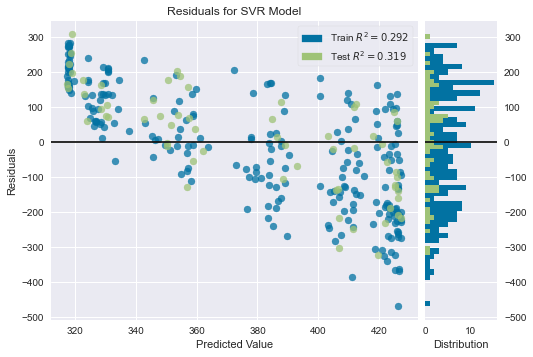

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
visualizer = ResidualsPlot(volume_svr)
visualizer.fit(volume_X_train, volume_y_train)
visualizer.score(volume_X_test, volume_y_test)
visualizer.show()

## Biomassa

In [43]:
biomass_models.sort_values(by=['R2 Manual'], ascending=False)

,Params,R2 Manual,R2 Sklearn,SYX,Pearson,RMSE,MAE
svm_hold_out,"{'C': 1.0, 'epsilon': 0.1}",3.91933,-274.354347,218561.021361,0.725198,455.667609,207.603475
svm_cross_val,"{'C': 1.0, 'epsilon': 0.1}",3.91933,-274.354347,218561.021361,0.725198,455.667609,207.603475
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",2.543841,-4.400916,115176.30396,0.875833,330.783145,237.199107
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",2.543841,-4.400916,115176.30396,0.875833,330.783145,237.199107
mlp_grid_search,"{'size': (100,), 'alpha': 0.0001}",2.543841,-4.400916,115176.30396,0.875833,330.783145,237.199107
svm_grid_search,"{'C': 50, 'epsilon': 0.1}",1.76196,0.124332,56961.089431,0.942562,232.622086,96.587559
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",1.76196,0.124332,56961.089431,0.942562,232.622086,96.587559
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",1.76196,0.124332,56961.089431,0.942562,232.622086,96.587559
rf_grid_search,"{'n_estimators': 100, 'max_depth': 4}",1.76196,0.124332,56961.089431,0.942562,232.622086,96.587559
knn,{'k': 3},1.291754,0.872147,21796.520825,0.947298,143.89821,71.326667


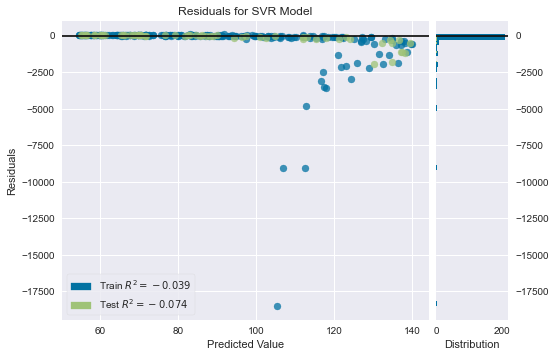

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
visualizer = ResidualsPlot(biomass_svr)
visualizer.fit(biomass_X_train, biomass_y_train)
visualizer.score(biomass_X_test, biomass_y_test)
visualizer.show()

## Admissão

In [46]:
admission_models.sort_values(by=['R2 Manual'], ascending=False)

,Params,R2 Manual,R2 Sklearn,SYX,Pearson,RMSE,MAE
knn,{'k': 9},0.975916,0.66686,0.004915,0.850769,0.067606,0.052633
svm_grid_search,"{'C': 50, 'epsilon': 0.1}",0.974594,0.662737,0.00463,0.883297,0.065621,0.054795
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",0.974594,0.662737,0.00463,0.883297,0.065621,0.054795
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",0.974594,0.662737,0.00463,0.883297,0.065621,0.054795
rf_grid_search,"{'n_estimators': 500, 'max_depth': 4}",0.974594,0.662737,0.00463,0.883297,0.065621,0.054795
svm_hold_out,"{'C': 1.0, 'epsilon': 0.1}",0.9707,0.409612,0.00546,0.857187,0.07126,0.058548
svm_cross_val,"{'C': 1.0, 'epsilon': 0.1}",0.9707,0.409612,0.00546,0.857187,0.07126,0.058548
mlp_grid_search,"{'size': (50, 50, 50), 'alpha': 0.05}",0.965938,0.485674,0.007039,0.77822,0.080907,0.061438
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",0.867739,0.098564,0.028456,0.436034,0.162678,0.128093
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",0.867739,0.098564,0.028456,0.436034,0.162678,0.128093


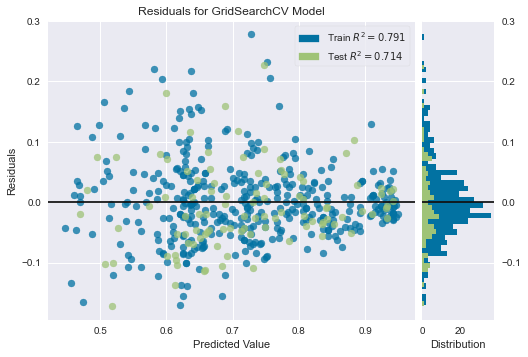

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
visualizer = ResidualsPlot(admission_knn)
visualizer.fit(admission_X_train, admission_y_train)
visualizer.score(admission_X_test, admission_y_test)
visualizer.show()

## Alunos Ensino Médio

In [49]:
students_models.sort_values(by=['R2 Manual'], ascending=False)

,Params,R2 Manual,R2 Sklearn,SYX,Pearson,RMSE,MAE
svm_hold_out,"{'C': 1.0, 'epsilon': 0.1}",1.077801,0.48056,9.434548,0.917504,2.56288,1.50812
svm_cross_val,"{'C': 1.0, 'epsilon': 0.1}",1.077801,0.48056,9.434548,0.917504,2.56288,1.50812
svm_grid_search,"{'C': 50, 'epsilon': 0.7}",1.046668,0.793614,5.687375,0.933108,1.989866,1.163357
rf_hold_out,"{'n_estimators': 100, 'max_depth': None}",1.046668,0.793614,5.687375,0.933108,1.989866,1.163357
rf_cross_val,"{'n_estimators': 100, 'max_depth': None}",1.046668,0.793614,5.687375,0.933108,1.989866,1.163357
rf_grid_search,"{'n_estimators': 500, 'max_depth': 5}",1.046668,0.793614,5.687375,0.933108,1.989866,1.163357
knn,{'k': 5},1.045108,0.802438,5.521455,0.931371,1.960625,1.306329
mlp_hold_out,"{'size': (100,), 'alpha': 0.0001}",1.043152,0.826086,5.266358,0.93398,1.914798,1.192621
mlp_cross_val,"{'size': (100,), 'alpha': 0.0001}",1.043152,0.826086,5.266358,0.93398,1.914798,1.192621
mlp_grid_search,"{'size': (50, 50, 50), 'alpha': 0.05}",1.032592,0.890465,3.996208,0.948181,1.667984,1.001783


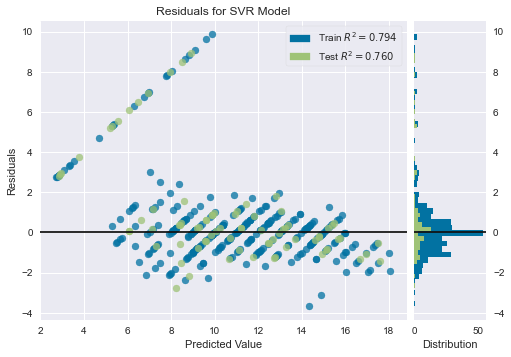

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [51]:
visualizer = ResidualsPlot(students_svr)
visualizer.fit(students_X_train, students_y_train)
visualizer.score(students_X_test, students_y_test)
visualizer.show()